# Машиное Обучение
##  Linear_classifier
### Хаммуд Обадах

A Linear classifier. This notebook calculates AC, Pred, Recall, F-beta and AUC. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
def F_beta(P,R,beta=1):
    return (1+beta**2)*(P*R)/((beta**2)*P+R)
def linear(data):
    x = data [:,0:-1]
    y = data[:,-1].astype(int)
    x_full = np.hstack((np.ones(len(x)).reshape((-1, 1)), x))
    y[y<1]=-1
    N_c =numpy.where(y==1)[0][0]+1
    randomness=100
    from sklearn.utils import shuffle
    x = shuffle(x, random_state = randomness)
    y = shuffle(y, random_state = randomness)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    Y=y_train.reshape((-1, 1))
    X = np.hstack((np.ones(len(X_train)).reshape((-1, 1)), X_train))
    N = len(X)
    delta = 1E-7
    eta = 5E-1
    max_iter = 500
    #w = np.array([0, 0, 0])
    #w_old = np.array([0, 0, 0])
    w=np.zeros(len(data[0]))
    w_old=np.zeros(len(data[0]))
    for t in range(0, max_iter):
        for i in range(0, N):
            x_i = X[i, :]
            y_i = Y[i]
            h = np.sign(np.dot(w, x_i))
            if h != y_i:
                w = w+eta*y_i*x_i
        w_old = w
    interval = np.linspace(np.min(X[:, 1])-1, np.max(X[:, 1])+1, 10)
    line = -w[0]/w[2]-w[1]/w[2]*interval
    if(len(d[0])==3):
        plt.plot(x_full[0:N_c-1, 1], x_full[0:N_c-1, 2], 'ro', x_full[N_c:, 1], x_full[N_c:, 2], 'bo', interval, line, 'k-')
        plt.show()
    TP=0
    TN=0
    FP=0
    FN=0
    Y=y_test.reshape((-1, 1))
    X = np.hstack((np.ones(len(X_test)).reshape((-1, 1)), X_test))
    for i in range(len(X_test)):
        x_i = X[i, :]
        y_i = Y[i]
        h = np.sign(np.dot(w, x_i))
        if h != y_i:
            if h==1:
                FN+=1
            else:
                FP+=1
        else:
            if h==1:
                TP+=1
            else:
                TN+=1
    AC=(TP+TN)/(TP+TN+FP+FN)
    Pred=TP/(TP+FP)
    Recall=TP/(TP+FN)
    TPR=TP/(TP+FN)
    FPR=FP/(FP+TN)
    TPR_FPR=np.zeros((3,2))
    TPR_FPR[0][0]=0
    TPR_FPR[0][1]=0
    TPR_FPR[1][0]=FPR
    TPR_FPR[1][1]=TPR
    TPR_FPR[2][0]=1
    TPR_FPR[2][1]=1
    AUC = (1-FPR)*(TPR)+(FPR*TPR)/2+(1-TPR)*(1-FPR)/2
    plt.plot(TPR_FPR[:,0],TPR_FPR[:,1])
    print("AC = " , AC,"Pred = " , Pred,"Recall = " , Recall,"F-beta = ",F_beta(Pred,Recall),"AUC = ",AUC)

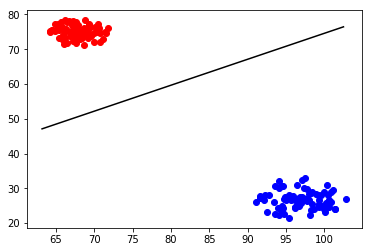

AC =  1.0 Pred =  1.0 Recall =  1.0 F-beta =  1.0 AUC =  1.0


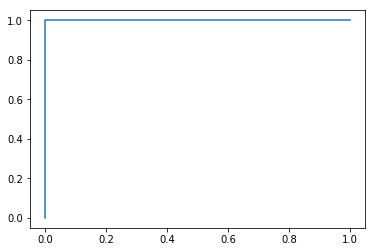

In [0]:
d = genfromtxt('binary.csv', delimiter=',')
linear(d)

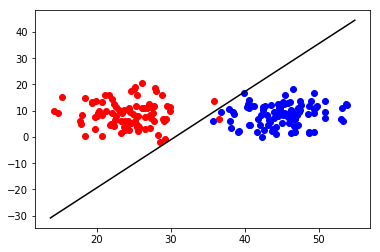

AC =  0.9736842105263158 Pred =  1.0 Recall =  0.9523809523809523 F-beta =  0.975609756097561 AUC =  0.9761904761904762


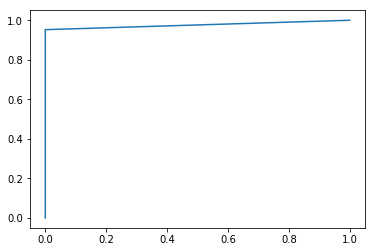

In [0]:
d = genfromtxt('binary_close.csv', delimiter=',')
linear(d)

[   0.    5.    7. ... 4989. 4993. 4994.]
[[-0.69  2.43  0.61 ...  0.6   2.42  1.  ]
 [-0.12 -0.94  1.29 ... -0.79 -0.12  0.  ]
 [ 0.86  0.29  2.19 ... -1.18  1.12  1.  ]
 ...
 [ 0.01 -1.99  0.16 ...  1.21 -0.27  1.  ]
 [-0.4   0.41 -0.48 ...  1.31  1.37  0.  ]
 [ 0.63 -0.07  2.71 ...  0.01  0.6   1.  ]]
AC =  0.9001512859304085 Pred =  0.9765395894428153 Recall =  0.8516624040920716 F-beta =  0.9098360655737706 AUC =  0.911016387231221


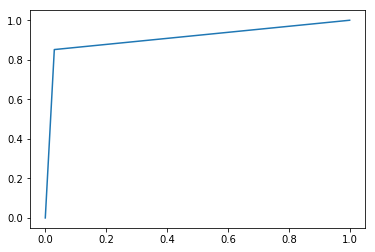

In [0]:
np.set_printoptions(suppress=True)
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
d = genfromtxt('waveform.csv', delimiter=',')
d_=d[:, [2, 3,-1]]
e=[]
#linear(d_)
#b=zeros((2,1))
b=d
counter=0
c=zeros((2,1))
for i in range(len(d)):
    if d[i][-1]==2.0 :
        #print(d[i][-1])
        #b=np.c_[b,d[i, [:]]]
        e= np.append(e , i)
        counter+=1
print(e)
c=numpy.delete(d, e, axis=0)
print(c)
linear(c)
